In [15]:
import pandas as pd
import numpy as np
import random 

In [21]:
# Set a seed for reproducibility
np.random.seed(0)

# Generating a list of unique counterparty_IDs
counterparty_ids = range(1, 1001)

# Generating a list of industries 
industries = ['Banking and Financial Services', 'Manufacturing', 'Services', 'Retail', 'Technology', 'Energy and Utilities', 'Real Estate and Construction']

# Generating a lsit of countries 
countries = ['US', 'UK', 'Germany', 'France', 'Switzerland', 'China', 'South Korea']

# Generating a list of ratings 
ratings = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']


In [27]:
# Generate random EAD, PD, and LGD values
ead = np.random.uniform(low = 1e6, high = 1e9, size = 1000)  # Exposure at defult
probability_of_default = np.random.uniform(low = 0.01, high = 0.2, size = 1000)  # Probability of default
lgd = np.random.uniform(low = 0.2, high = 0.8, size = 1000)  # Loss given default

# Generate random industries, countries, and ratings
industry = [random.choice(industries) for _ in counterpart_ids]
country = [random.choice(countries) for _ in counterpart_ids]
rating = [random.choice(ratings) for _ in counterpart_ids]

# Generate a DataFrame 
data = pd.DataFrame({
    'CounterpartyID': counterparty_ids,
    'EAD': ead,
    'PD': probability_of_default,
    'LGD': lgd, 'Industry': industry,
    'Country': country,
    'Rating': rating
})
data.head()

,CounterpartyID,EAD,PD,LGD,Industry,Country,Rating
0,1,3.754187e+08,0.124296,0.474656,Energy and Utilities,US,BBB
1,2,4.292573e+08,0.107571,0.426151,Banking and Financial Services,Switzerland,BBB
2,3,6.833736e+08,0.158606,0.621401,Retail,South Korea,BBB
3,4,6.013468e+08,0.178545,0.324394,Banking and Financial Services,China,C
4,5,7.141250e+07,0.010382,0.244568,Energy and Utilities,Germany,CCC


 Regulatory and Risk Management Processes Overview

 Pillar-I (Basel III Minimum Capital Requirement)
- Sets the minimum capital banks must hold to cover risks: credit risk, market risk, and operational risk.
- Credit risk capital requirement formula:
  Capital Requirement} = EAD * PD * LGD * 12.5
- The multiplier 12.5 converts risk-weighted assets into capital requirements (since capital = 8% of RWA, and \(1/0.08=12.5\)).
- Market risk and operational risk are calculated separately with their own models.

 CCAR (Comprehensive Capital Analysis and Review)
- A regulatory stress testing framework by the US Federal Reserve.
- Banks submit capital plans including capital distributions (dividends/share buybacks).
- The Fed evaluates if banks maintain adequate capital under adverse economic scenarios.
- It is a forward-looking assessment of capital adequacy and management strategies.

 IFRS-9 (Expected Credit Loss Model)
- An international accounting standard for financial instruments.
- Requires banks to estimate credit losses expected over the life of loans at origination.
- Moves from “incurred loss” to forward-looking “expected credit loss” models.
- Requires staging of loans by credit quality and recognition of expected losses accordingly.

 Internal Stress Testing
- Bank-led stress tests to assess resilience to hypothetical shocks.
- Scenarios may include economic recessions, sharp rate hikes, or market crashes.
- Helps identify vulnerabilities and prepare risk mitigation plans.

---


In [38]:
# Calculate the Capital Requirement under Pillar 1
data['Pillar_I_Capital_Requirement'] = data['EAD'] * data['PD'] * data['LGD'] *12.5
data.head()

,CounterpartyID,EAD,PD,LGD,Industry,Country,Rating,Pillar_I_Capital_Requirement
0,1,3.754187e+08,0.124296,0.474656,Energy and Utilities,US,BBB,2.768620e+08
1,2,4.292573e+08,0.107571,0.426151,Banking and Financial Services,Switzerland,BBB,2.459733e+08
2,3,6.833736e+08,0.158606,0.621401,Retail,South Korea,BBB,8.418991e+08
3,4,6.013468e+08,0.178545,0.324394,Banking and Financial Services,China,C,4.353673e+08
4,5,7.141250e+07,0.010382,0.244568,Energy and Utilities,Germany,CCC,2.266603e+06


In [40]:
# Calculate the stressed capital requirement for CCAR
data['Stressed_PD'] = data['PD'] * 1.5     # 50% increase in PD
data['Stressed_LGD'] = data['LGD'] * 1.2   # 20% increase in LGD
data['Capital_Requirement_CCAR'] = data['EAD'] * data['Stressed_PD'] * data['Stressed_LGD'] * 12.5
data.head()

,CounterpartyID,EAD,PD,LGD,Industry,Country,Rating,Pillar_I_Capital_Requirement,Stressed_PD,Stressed_LGD,Capital_Requirement_CCAR
0,1,3.754187e+08,0.124296,0.474656,Energy and Utilities,US,BBB,2.768620e+08,0.186445,0.569587,4.983516e+08
1,2,4.292573e+08,0.107571,0.426151,Banking and Financial Services,Switzerland,BBB,2.459733e+08,0.161357,0.511381,4.427520e+08
2,3,6.833736e+08,0.158606,0.621401,Retail,South Korea,BBB,8.418991e+08,0.237909,0.745681,1.515418e+09
3,4,6.013468e+08,0.178545,0.324394,Banking and Financial Services,China,C,4.353673e+08,0.267817,0.389273,7.836612e+08
4,5,7.141250e+07,0.010382,0.244568,Energy and Utilities,Germany,CCC,2.266603e+06,0.015573,0.293481,4.079886e+06


In [42]:
# Calculate the expected credit loss for IFRS-9
data['Expected_Credit_Loss_IFRS9'] = data['EAD'] * data['PD'] * data['LGD']
data.head()

,CounterpartyID,EAD,PD,LGD,Industry,Country,Rating,Pillar_I_Capital_Requirement,Stressed_PD,Stressed_LGD,Capital_Requirement_CCAR,Expected_Credit_Loss_IFRS9
0,1,3.754187e+08,0.124296,0.474656,Energy and Utilities,US,BBB,2.768620e+08,0.186445,0.569587,4.983516e+08,2.214896e+07
1,2,4.292573e+08,0.107571,0.426151,Banking and Financial Services,Switzerland,BBB,2.459733e+08,0.161357,0.511381,4.427520e+08,1.967787e+07
2,3,6.833736e+08,0.158606,0.621401,Retail,South Korea,BBB,8.418991e+08,0.237909,0.745681,1.515418e+09,6.735193e+07
3,4,6.013468e+08,0.178545,0.324394,Banking and Financial Services,China,C,4.353673e+08,0.267817,0.389273,7.836612e+08,3.482939e+07
4,5,7.141250e+07,0.010382,0.244568,Energy and Utilities,Germany,CCC,2.266603e+06,0.015573,0.293481,4.079886e+06,1.813282e+05


In [44]:
# Calculate the stressed capital requirement for internal stress testing
data['Stressed_PD_Internal'] = data['PD'] * 2.0  # 100% increase in PD
data['Stressed_LGD_Internal'] = data['LGD'] * 1.5  # 50% increase in LGD
data['Capital_Requirement_Internal_Stress_Test'] = data['EAD'] * data['Stressed_PD_Internal'] * data['Stressed_LGD_Internal'] * 12.5
data.head()

,CounterpartyID,EAD,PD,LGD,Industry,Country,Rating,Pillar_I_Capital_Requirement,Stressed_PD,Stressed_LGD,Capital_Requirement_CCAR,Expected_Credit_Loss_IFRS9,Stressed_PD_Internal,Stressed_LGD_Internal,Capital_Requirement_Internal_Stress_Test
0,1,3.754187e+08,0.124296,0.474656,Energy and Utilities,US,BBB,2.768620e+08,0.186445,0.569587,4.983516e+08,2.214896e+07,0.248593,0.711984,8.305859e+08
1,2,4.292573e+08,0.107571,0.426151,Banking and Financial Services,Switzerland,BBB,2.459733e+08,0.161357,0.511381,4.427520e+08,1.967787e+07,0.215143,0.639226,7.379200e+08
2,3,6.833736e+08,0.158606,0.621401,Retail,South Korea,BBB,8.418991e+08,0.237909,0.745681,1.515418e+09,6.735193e+07,0.317212,0.932102,2.525697e+09
3,4,6.013468e+08,0.178545,0.324394,Banking and Financial Services,China,C,4.353673e+08,0.267817,0.389273,7.836612e+08,3.482939e+07,0.357090,0.486592,1.306102e+09
4,5,7.141250e+07,0.010382,0.244568,Energy and Utilities,Germany,CCC,2.266603e+06,0.015573,0.293481,4.079886e+06,1.813282e+05,0.020765,0.366852,6.799809e+06


In [54]:
data['Perc_Increase_Baseline_to_Severe'] = (data['Capital_Requirement_Internal_Stress_Test'] - data['Pillar_I_Capital_Requirement']) / data['Pillar_I_Capital_Requirement'] * 100

max_increase = data['Perc_Increase_Baseline_to_Severe'].max()
print(f"Maximum capital increase under severe stress: {max_increase:.2f}%")


Maximum capital increase under severe stress: 200.00%


C:\Users\Ahmad Reza\AppData\Local\Temp\ipykernel_15340\2212759557.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Industry', y='EAD', data=data, estimator=np.mean, ci=None)


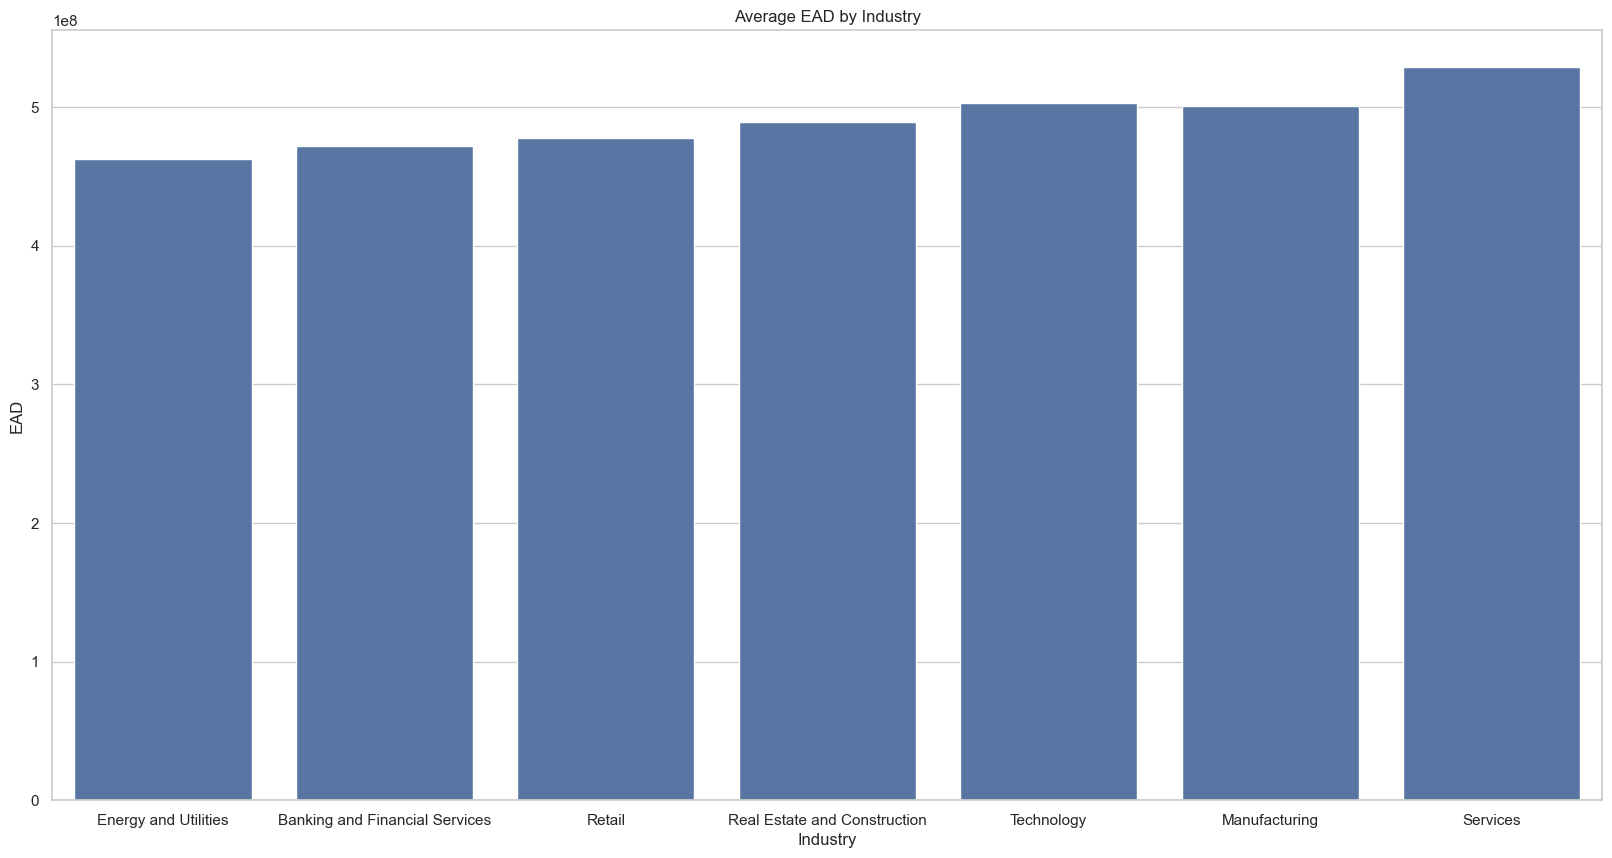

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for our plots
sns.set(style='whitegrid')

# Create a bar plot for the average EAD by industry
plt.figure(figsize=(20, 10))
sns.barplot(x='Industry', y='EAD', data=data, estimator=np.mean, ci=None)
plt.title('Average EAD by Industry')
plt.show()

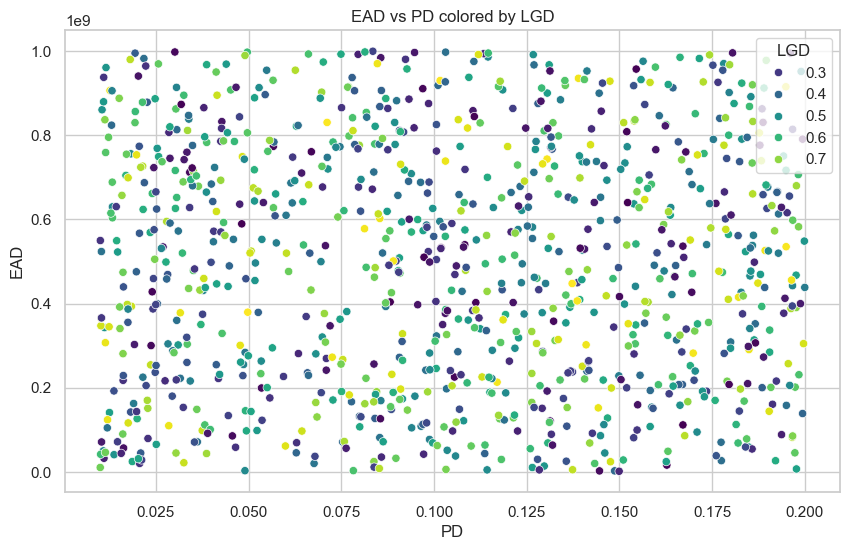

In [48]:
# Create a scatter plot for EAD vs PD, colored by LGD
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PD', y='EAD', hue='LGD', data=data, palette='viridis')
plt.title('EAD vs PD colored by LGD')
plt.show()

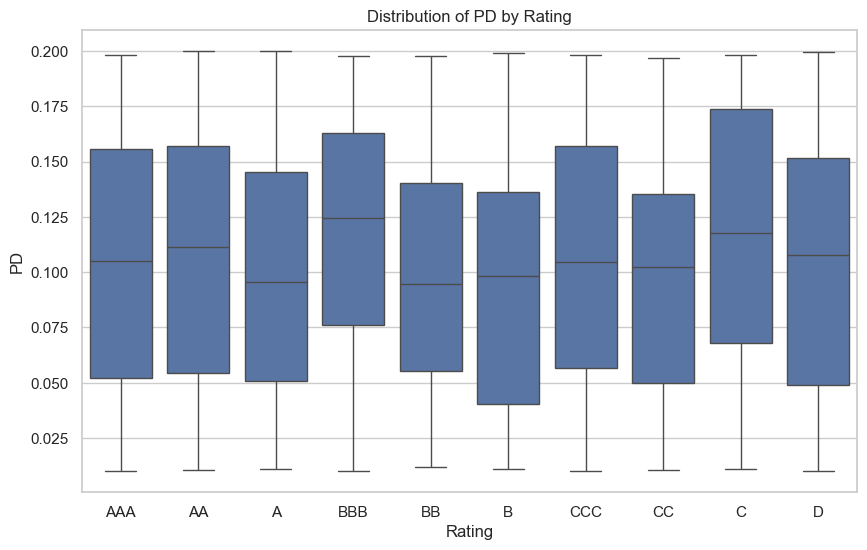

In [52]:
# Create a box plot for the distribution of PD by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='PD', data=data, order=ratings)
plt.title('Distribution of PD by Rating')
plt.show()

In [56]:
data.to_csv('credit_risk_model_data.csv', index=False)